<a href="https://colab.research.google.com/github/perch97/Machine_Learning_HSE/blob/main/Classifiers_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Бинарные классификаторы

## Импорт библиотек

In [ ]:
%%capture
!pip install --upgrade mlxtend

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Функция потерь

Бинарный линейный классификатор делает предсказание по формуле
$$a(x) = (w,x).$$

А вот функции потерь у разных классификаторов разные.

*  Функция потерь логистической регрессии:

$$
Q_{LR}(X, w) = -\frac{1}{\ell} \sum_{i=1}^{\ell} [y_i = 1]\log\sigma(\langle x_i, w \rangle) + [y_i = -1]\log(1-\sigma(\langle x_i, w \rangle),
$$
где $\sigma(z)=\frac1{1+e^{-z}}$.


Эта функция называется log-loss.

*  Функция потерь метода опорных векторов:

$$
Q_{SVM}(X, w) = C\sum_{i=1}^{l} \max\{0, 1 - y_i(\langle x_i, w\rangle)\} + \|w\|^2 \to \min_w,
$$
где $C$ - гиперпараметр.

Рассмотрим свойства логистической регрессии и метода опорных векторов на примере классического набора данных ["Ирисы Фишера"](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Этот набор состоит из 150 наблюдений, каждое из которых представляет собой четыре измерения: длина наружной доли околоцветника (`sepal length`), ширина наружной доли околоцветника (`sepal width`), длина внутренней доли околоцветника (`petal length`), ширина внутренней доли околоцветника (`petal width`). Каждое наблюдение относится к одному из трёх классов ириса: `setosa`, `versicolor` или `virginica`.

Задача состоит в том, чтобы по измерениям предсказать класс цветка.

[<img src="https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png" alt="drawing" width="800"/>](https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png)

## Обзор данных

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
set(y)

{0, 1, 2}

## Задача

Перейдём к задаче бинарной классификации: будем предсказывать принадлежность цветка к виду `versicolor` против принадлежности ко всем прочим видам. Перекодируем целевую переменную так, чтобы цветки вида `versicolor` имели метку 1, а прочих видов – метку 0.

In [ ]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
y[y != 1] = 0

y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Наши следующие действия:

*  Будем работать с двумя признаками: `sepal length (cm)` и `sepal width (cm)`. Сделаем из  них в отдельную матрицу.
*  Отмасштабируем выборки при помощи StandardScaler.
*  Построим диаграмму рассеяния по тренировочной выборке и убедимся, что данные линейно не разделимы.

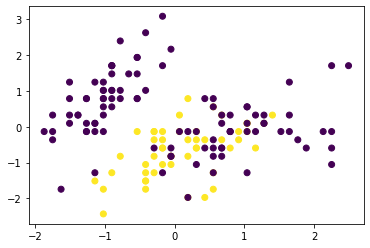

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(123)

X = X[['sepal length (cm)', 'sepal width (cm)']]

ss = StandardScaler()
X = ss.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c = y);

Обучим логистическую регрессию и метод опорных векторов на тренировочной выборке и убедимся, что полученные веса различаются.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

lr = LogisticRegression()
lr.fit(X, y)

svm = LinearSVC()
svm.fit(X, y)

print(lr.coef_)
print(svm.coef_)

[[ 0.10322342 -1.29986455]]
[[ 0.02577121 -0.52075038]]


Теперь посмотрим, как различаются решающие поверхности алгоритмов.

Код ниже построит решающие поверхности для классификаторов.

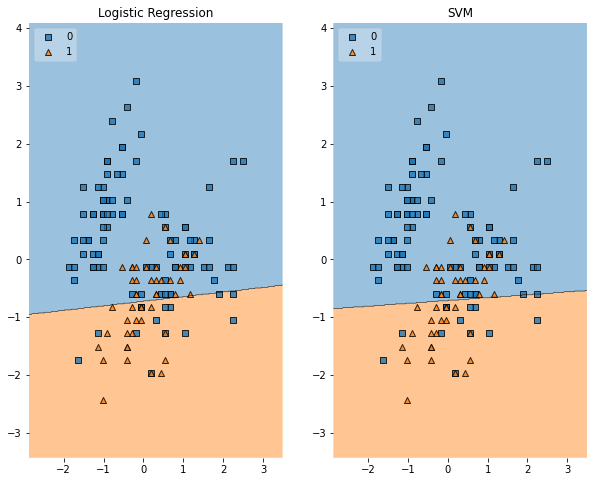

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'SVM']
for clf, lab, grd in zip([lr, svm],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=np.array(y), clf=clf, legend=2)
    plt.title(lab)

plt.show();